In [39]:
!pip install graphviz # reliable, basic tool for tree viz 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import graphviz 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Classifier since response variable is categorical
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score 
! pip install dmba
from dmba import classificationSummary


In [3]:
xlsx = pd.ExcelFile('UniversalBank.xlsx')
bank_df = pd.read_excel(xlsx, 'Data') # reading a specific worksheet from the excel file
bank_df.info()
bank_df.columns = bank_df.columns.str.replace(' ','') # replaces spaces in the column headers 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [4]:
bank_df.drop(columns = ['ID','ZIPCode'], inplace=True) #no need to overwrite df...just replace memory 
X = bank_df.drop(columns=['PersonalLoan'])
y = bank_df['PersonalLoan'] # pandas series created (only one column)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [6]:
fullClassTree = DecisionTreeClassifier(random_state=1) # decision tree is deterministic so why random state? 
# this SHUFFLES the features...if features in a particular order then selected in that order
# so same rand_state to ensure that the split is the same 

In [7]:
fullClassTree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
y_predicted = fullClassTree.predict(X_test)

In [9]:
accuracy_score(y_test, y_predicted)

0.96

In [10]:
classificationSummary(y_train, fullClassTree.predict(X_train)) # likely case of OVERFITTING 


Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 4064    0
     1    0  436


In [11]:
print(fullClassTree.tree_.max_depth)
print(fullClassTree.tree_.node_count) # BIG TREE
print(fullClassTree.get_n_leaves())

27
395
198


In [12]:
classificationSummary(y_test,fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.9600)

       Prediction
Actual   0   1
     0 448   8
     1  12  32


In [13]:
fullClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

In [14]:
feature_names = list(X.columns)
text_representation = tree.export_text(fullClassTree, feature_names=feature_names)

In [15]:
print(text_representation)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |--- Age <= 34.00
|   |   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Age >  27.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  34.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |--- CCAvg <= 1.25
|   |   |   |   |   |   |--- CCAvg <= 1.05
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- CCAvg >  1.05
|   |   |   |   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Income >  110.00
|   |   |   |   | 

In [16]:
list_int = list(y.unique())
class_names = list(map(str,list_int))

In [17]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(fullClassTree, feature_names=feature_names,class_names=class_names,
              rounded=True,filled=True)
plt.show()

In [18]:
dot_data = export_graphviz(fullClassTree,out_file='fullClassTree.dot',
                          feature_names=feature_names,class_names=class_names,
                          rounded=True,filled=True)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
dt = DecisionTreeClassifier(random_state=42)

In [22]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [23]:
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [24]:
grid.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [25]:
print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.95525


In [26]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Test accuracy: 0.954


In [ ]:
# Another example

In [40]:
reviews = pd.read_csv("Reviews.csv")

In [41]:
y = reviews['Score'] # pandas series created (only one column)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a binary DTM (1 if the term appears in the document, else 0)
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(reviews["Text"])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [44]:
fullClassTree = DecisionTreeClassifier(random_state=1) # decision tree is deterministic so why random state? 

In [45]:
fullClassTree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
# Evaluate
accuracy = fullClassTree.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.3f}")
feature_names = vectorizer.get_feature_names_out().tolist()
text_representation = tree.export_text(fullClassTree, feature_names = feature_names)
print(text_representation)

Test Accuracy: 0.614
|--- probably <= 0.50
|   |--- however <= 0.50
|   |   |--- gross <= 0.50
|   |   |   |--- star <= 0.50
|   |   |   |   |--- but <= 0.50
|   |   |   |   |   |--- horrible <= 0.50
|   |   |   |   |   |   |--- threw <= 0.50
|   |   |   |   |   |   |   |--- problem <= 0.50
|   |   |   |   |   |   |   |   |--- disappointed <= 0.50
|   |   |   |   |   |   |   |   |   |--- china <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- pieces <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 26
|   |   |   |   |   |   |   |   |   |   |--- pieces >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- china >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- disappointed >  0.50
|   |   |   |   |   |   |   |   |   |--- you <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- artificial <= 0.50
|   |   |   |   |   |   |   |   |   

In [47]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()

# Indices of features used in splits
split_features = fullClassTree.tree_.feature

# Root and its first two children (indices 0, 1, 2)
root_idx = split_features[0]
left_child_idx = split_features[fullClassTree.tree_.children_left[0]]
right_child_idx = split_features[fullClassTree.tree_.children_right[0]]

tokens = [
    feature_names[root_idx],
    feature_names[left_child_idx],
    feature_names[right_child_idx]
]

print("Top 3 tokens at root and first two children:", tokens)


Top 3 tokens at root and first two children: ['probably', 'however', 'other']


In [48]:
tokens_manual = ['probably', 'however', 'other']
for token in tokens_manual:
    count = (X.toarray()[:, vectorizer.vocabulary_[token]] > 0).sum()
    print(f"Token '{token}' occurs in {count} documents.")

Token 'probably' occurs in 22 documents.
Token 'however' occurs in 38 documents.
Token 'other' occurs in 98 documents.


In [49]:
param_grid = {
    "max_depth": [3, 5, 10, 20, None],
    "max_leaf_nodes": [5, 10, 20, 50, None],
    "min_impurity_decrease": [0.0, 0.001, 0.005, 0.01]
}

In [50]:
grid_search = GridSearchCV(
    estimator=fullClassTree,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [3, 5, ...], 'max_leaf_nodes': [5, 10, ...], 'min_impurity_decrease': [0.0, 0.001, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [51]:
# --- Results ---
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0}
Best cross-validation accuracy: 0.6249762040738626


In [52]:
text_representation = tree.export_text(fullClassTree, feature_names=feature_names)
print(text_representation)

|--- probably <= 0.50
|   |--- however <= 0.50
|   |   |--- gross <= 0.50
|   |   |   |--- star <= 0.50
|   |   |   |   |--- but <= 0.50
|   |   |   |   |   |--- horrible <= 0.50
|   |   |   |   |   |   |--- threw <= 0.50
|   |   |   |   |   |   |   |--- problem <= 0.50
|   |   |   |   |   |   |   |   |--- disappointed <= 0.50
|   |   |   |   |   |   |   |   |   |--- china <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- pieces <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 26
|   |   |   |   |   |   |   |   |   |   |--- pieces >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- china >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- disappointed >  0.50
|   |   |   |   |   |   |   |   |   |--- you <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- artificial <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1

In [ ]:
# MOving onto neural networks

In [56]:
import pandas as pd
! pip install pydot
from tensorflow.keras.utils import plot_model
import numpy as np
from sklearn import preprocessing
%pip install tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
np.random.seed(42)
tf.random.set_seed(42)
from sklearn.datasets import load_breast_cancer


  Using cached pydot-4.0.1-py3-none-any.whl.metadata (11 kB)
Using cached pydot-4.0.1-py3-none-any.whl (37 kB)
Note: you may need to restart the kernel to use updated packages.


In [71]:
X, y = load_breast_cancer(return_X_y = True)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [73]:
scaler= preprocessing.MinMaxScaler().fit(X_train)


In [74]:
X_train_scaled = scaler.transform(X_train)

In [75]:
model = Sequential(name = "ANN")

model.add(Input(shape=(X_train_scaled.shape[1],), name="input_features"))

model.add(Dense(32, activation = "sigmoid", kernel_initializer = "glorot_uniform", name="hidden"))

model.add(Dense(1, activation = "sigmoid", name="output"))

model.compile(optimizer=RMSprop(learning_rate = 1e-3),
             loss = "binary_crossentropy",
             metrics=["accuracy"])

In [76]:
history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/40
12/12 - 1s - 43ms/step - accuracy: 0.6374 - loss: 0.6640 - val_accuracy: 0.6593 - val_loss: 0.6365
Epoch 2/40
12/12 - 0s - 6ms/step - accuracy: 0.6319 - loss: 0.6378 - val_accuracy: 0.6703 - val_loss: 0.6142
Epoch 3/40
12/12 - 0s - 5ms/step - accuracy: 0.6374 - loss: 0.6201 - val_accuracy: 0.7033 - val_loss: 0.5956
Epoch 4/40
12/12 - 0s - 6ms/step - accuracy: 0.6511 - loss: 0.6043 - val_accuracy: 0.7363 - val_loss: 0.5788
Epoch 5/40
12/12 - 0s - 6ms/step - accuracy: 0.6731 - loss: 0.5894 - val_accuracy: 0.7473 - val_loss: 0.5628
Epoch 6/40
12/12 - 0s - 6ms/step - accuracy: 0.7005 - loss: 0.5750 - val_accuracy: 0.7802 - val_loss: 0.5475
Epoch 7/40
12/12 - 0s - 6ms/step - accuracy: 0.7280 - loss: 0.5611 - val_accuracy: 0.7912 - val_loss: 0.5326
Epoch 8/40
12/12 - 0s - 6ms/step - accuracy: 0.7418 - loss: 0.5474 - val_accuracy: 0.8352 - val_loss: 0.5181
Epoch 9/40
12/12 - 0s - 6ms/step - accuracy: 0.7857 - loss: 0.5340 - val_accuracy: 0.8352 - val_loss: 0.5040
Epoch 10/40
12/12 

In [77]:
X_test_scaled = scaler.transform(X_test)

In [78]:
predictions = model.predict(X_test_scaled)
print(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[0.88440216]
 [0.11534989]
 [0.90811425]
 [0.92290914]
 [0.8188107 ]
 [0.03730031]
 [0.07074918]
 [0.89510393]
 [0.8435887 ]
 [0.9489814 ]
 [0.3689609 ]
 [0.90797466]
 [0.7986581 ]
 [0.84309995]
 [0.8588999 ]
 [0.9477079 ]
 [0.9336587 ]
 [0.21627074]
 [0.23600069]
 [0.5069488 ]
 [0.8555966 ]
 [0.6963725 ]
 [0.5207398 ]
 [0.82317567]
 [0.16533776]
 [0.872764  ]
 [0.8656637 ]
 [0.7944765 ]
 [0.21840553]
 [0.08178211]
 [0.2605012 ]
 [0.9018049 ]
 [0.22981396]
 [0.7839383 ]
 [0.8068296 ]
 [0.95324713]
 [0.9093809 ]
 [0.94880456]
 [0.8674516 ]
 [0.06980215]
 [0.88613236]
 [0.16147827]
 [0.81755525]
 [0.8089372 ]
 [0.49299318]
 [0.87277776]
 [0.46821928]
 [0.86250055]
 [0.4997223 ]
 [0.26757312]
 [0.52282   ]
 [0.9502836 ]
 [0.9351771 ]
 [0.85207534]
 [0.44466418]
 [0.11777975]
 [0.92366487]
 [0.28782448]
 [0.8999537 ]
 [0.90668166]
 [0.05379463]
 [0.11632126]
 [0.9405899 ]
 [0.1279851 ]
 [0.48626098]
 [0.798143  ]
 [0.535892  ]
 [0.7503027 ]
 [0.735289

In [79]:
! pip install pydot
from sklearn.model_selection import GridSearchCV
%pip install scikeras
from scikeras.wrappers import KerasClassifier

Note: you may need to restart the kernel to use updated packages.


In [80]:
def build_model(optimizer="RMSprop", lr=1e-3, units=32, act="sigmoid"):
    model = Sequential(name = "ANN_Tunable")
    model.add(Input(shape=(X_train_scaled.shape[1],), name="input_features"))
    model.add(Dense(units, activation = act, kernel_initializer = "glorot_uniform", name="hidden"))
    model.add(Dense(1, activation = "sigmoid", name="output"))
    
    if isinstance(optimizer, str):
        opt_name = optimizer.lower()
        if opt_name == "rmsprop":
            opt=tf.keras.optimizers.RMSprop(learning_rate=lr)
        elif opt_name in ("sgd", "sgd_m"):
            opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
        else:
            opt = tf.keras.optimizers.get(optimizer)
    else:
        opt = optimizer
        
    model.compile(optimizer=opt,loss = "binary_crossentropy",metrics=["accuracy"])
    return model

In [81]:
clf = KerasClassifier(model=build_model, epochs= 40, batch_size=32, verbose=2)

In [83]:
param_grid = {
    "model__units": [16, 32, 64], 
    "model__optimizer": ["RMSprop", "sgd"],
    "model__lr":[1e-2, 1e-3]
}

In [84]:
grid = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=1)

In [85]:
grid.fit(X_train_scaled, y_train)

Epoch 1/40
10/10 - 0s - 41ms/step - accuracy: 0.6667 - loss: 0.6126
Epoch 2/40
10/10 - 0s - 4ms/step - accuracy: 0.8251 - loss: 0.5183
Epoch 3/40
10/10 - 0s - 4ms/step - accuracy: 0.8779 - loss: 0.4548
Epoch 4/40
10/10 - 0s - 4ms/step - accuracy: 0.9142 - loss: 0.4010
Epoch 5/40
10/10 - 0s - 4ms/step - accuracy: 0.9307 - loss: 0.3548
Epoch 6/40
10/10 - 0s - 4ms/step - accuracy: 0.9307 - loss: 0.3156
Epoch 7/40
10/10 - 0s - 4ms/step - accuracy: 0.9439 - loss: 0.2829
Epoch 8/40
10/10 - 0s - 4ms/step - accuracy: 0.9505 - loss: 0.2559
Epoch 9/40
10/10 - 0s - 4ms/step - accuracy: 0.9538 - loss: 0.2337
Epoch 10/40
10/10 - 0s - 4ms/step - accuracy: 0.9538 - loss: 0.2153
Epoch 11/40
10/10 - 0s - 4ms/step - accuracy: 0.9571 - loss: 0.2000
Epoch 12/40
10/10 - 0s - 3ms/step - accuracy: 0.9571 - loss: 0.1873
Epoch 13/40
10/10 - 0s - 4ms/step - accuracy: 0.9604 - loss: 0.1767
Epoch 14/40
10/10 - 0s - 3ms/step - accuracy: 0.9637 - loss: 0.1676
Epoch 15/40
10/10 - 0s - 4ms/step - accuracy: 0.9637 - l

Epoch 20/40
10/10 - 0s - 3ms/step - accuracy: 0.9671 - loss: 0.1614
Epoch 21/40
10/10 - 0s - 4ms/step - accuracy: 0.9671 - loss: 0.1557
Epoch 22/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.1506
Epoch 23/40
10/10 - 0s - 3ms/step - accuracy: 0.9704 - loss: 0.1458
Epoch 24/40
10/10 - 0s - 3ms/step - accuracy: 0.9704 - loss: 0.1414
Epoch 25/40
10/10 - 0s - 3ms/step - accuracy: 0.9704 - loss: 0.1373
Epoch 26/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.1334
Epoch 27/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.1299
Epoch 28/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.1265
Epoch 29/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.1233
Epoch 30/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.1203
Epoch 31/40
10/10 - 0s - 4ms/step - accuracy: 0.9737 - loss: 0.1174
Epoch 32/40
10/10 - 0s - 3ms/step - accuracy: 0.9737 - loss: 0.1147
Epoch 33/40
10/10 - 0s - 5ms/step - accuracy: 0.9770 - loss: 0.1121
Epoch 34/40
10/10 - 0s - 4ms/step - accuracy: 0.

Epoch 20/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.1280
Epoch 21/40
10/10 - 0s - 4ms/step - accuracy: 0.9737 - loss: 0.1240
Epoch 22/40
10/10 - 0s - 4ms/step - accuracy: 0.9737 - loss: 0.1204
Epoch 23/40
10/10 - 0s - 4ms/step - accuracy: 0.9737 - loss: 0.1170
Epoch 24/40
10/10 - 0s - 4ms/step - accuracy: 0.9737 - loss: 0.1139
Epoch 25/40
10/10 - 0s - 4ms/step - accuracy: 0.9737 - loss: 0.1109
Epoch 26/40
10/10 - 0s - 4ms/step - accuracy: 0.9770 - loss: 0.1081
Epoch 27/40
10/10 - 0s - 4ms/step - accuracy: 0.9737 - loss: 0.1055
Epoch 28/40
10/10 - 0s - 4ms/step - accuracy: 0.9737 - loss: 0.1030
Epoch 29/40
10/10 - 0s - 4ms/step - accuracy: 0.9737 - loss: 0.1006
Epoch 30/40
10/10 - 0s - 4ms/step - accuracy: 0.9737 - loss: 0.0983
Epoch 31/40
10/10 - 0s - 4ms/step - accuracy: 0.9770 - loss: 0.0962
Epoch 32/40
10/10 - 0s - 4ms/step - accuracy: 0.9770 - loss: 0.0942
Epoch 33/40
10/10 - 0s - 4ms/step - accuracy: 0.9770 - loss: 0.0922
Epoch 34/40
10/10 - 0s - 4ms/step - accuracy: 0.

Epoch 20/40
10/10 - 0s - 4ms/step - accuracy: 0.9671 - loss: 0.1150
Epoch 21/40
10/10 - 0s - 4ms/step - accuracy: 0.9671 - loss: 0.1116
Epoch 22/40
10/10 - 0s - 3ms/step - accuracy: 0.9671 - loss: 0.1084
Epoch 23/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.1055
Epoch 24/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.1027
Epoch 25/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.1002
Epoch 26/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.0977
Epoch 27/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.0954
Epoch 28/40
10/10 - 0s - 4ms/step - accuracy: 0.9704 - loss: 0.0933
Epoch 29/40
10/10 - 0s - 4ms/step - accuracy: 0.9737 - loss: 0.0912
Epoch 30/40
10/10 - 0s - 4ms/step - accuracy: 0.9737 - loss: 0.0893
Epoch 31/40
10/10 - 0s - 4ms/step - accuracy: 0.9770 - loss: 0.0874
Epoch 32/40
10/10 - 0s - 4ms/step - accuracy: 0.9770 - loss: 0.0856
Epoch 33/40
10/10 - 0s - 4ms/step - accuracy: 0.9770 - loss: 0.0839
Epoch 34/40
10/10 - 0s - 4ms/step - accuracy: 0.

Epoch 20/40
10/10 - 0s - 4ms/step - accuracy: 0.6711 - loss: 0.5550
Epoch 21/40
10/10 - 0s - 4ms/step - accuracy: 0.6743 - loss: 0.5477
Epoch 22/40
10/10 - 0s - 4ms/step - accuracy: 0.6875 - loss: 0.5403
Epoch 23/40
10/10 - 0s - 4ms/step - accuracy: 0.6908 - loss: 0.5328
Epoch 24/40
10/10 - 0s - 4ms/step - accuracy: 0.7072 - loss: 0.5251
Epoch 25/40
10/10 - 0s - 4ms/step - accuracy: 0.7368 - loss: 0.5174
Epoch 26/40
10/10 - 0s - 4ms/step - accuracy: 0.7599 - loss: 0.5096
Epoch 27/40
10/10 - 0s - 4ms/step - accuracy: 0.7730 - loss: 0.5017
Epoch 28/40
10/10 - 0s - 4ms/step - accuracy: 0.7862 - loss: 0.4937
Epoch 29/40
10/10 - 0s - 4ms/step - accuracy: 0.8026 - loss: 0.4857
Epoch 30/40
10/10 - 0s - 4ms/step - accuracy: 0.8191 - loss: 0.4777
Epoch 31/40
10/10 - 0s - 4ms/step - accuracy: 0.8355 - loss: 0.4697
Epoch 32/40
10/10 - 0s - 4ms/step - accuracy: 0.8388 - loss: 0.4617
Epoch 33/40
10/10 - 0s - 4ms/step - accuracy: 0.8487 - loss: 0.4538
Epoch 34/40
10/10 - 0s - 4ms/step - accuracy: 0.

Epoch 20/40
10/10 - 0s - 4ms/step - accuracy: 0.8289 - loss: 0.4607
Epoch 21/40
10/10 - 0s - 4ms/step - accuracy: 0.8454 - loss: 0.4508
Epoch 22/40
10/10 - 0s - 4ms/step - accuracy: 0.8553 - loss: 0.4410
Epoch 23/40
10/10 - 0s - 4ms/step - accuracy: 0.8618 - loss: 0.4314
Epoch 24/40
10/10 - 0s - 3ms/step - accuracy: 0.8717 - loss: 0.4219
Epoch 25/40
10/10 - 0s - 4ms/step - accuracy: 0.8783 - loss: 0.4127
Epoch 26/40
10/10 - 0s - 4ms/step - accuracy: 0.8849 - loss: 0.4037
Epoch 27/40
10/10 - 0s - 4ms/step - accuracy: 0.8882 - loss: 0.3948
Epoch 28/40
10/10 - 0s - 3ms/step - accuracy: 0.8914 - loss: 0.3862
Epoch 29/40
10/10 - 0s - 4ms/step - accuracy: 0.8980 - loss: 0.3778
Epoch 30/40
10/10 - 0s - 4ms/step - accuracy: 0.9079 - loss: 0.3696
Epoch 31/40
10/10 - 0s - 4ms/step - accuracy: 0.9145 - loss: 0.3617
Epoch 32/40
10/10 - 0s - 4ms/step - accuracy: 0.9145 - loss: 0.3540
Epoch 33/40
10/10 - 0s - 4ms/step - accuracy: 0.9243 - loss: 0.3465
Epoch 34/40
10/10 - 0s - 4ms/step - accuracy: 0.

Epoch 20/40
10/10 - 0s - 4ms/step - accuracy: 0.8059 - loss: 0.4746
Epoch 21/40
10/10 - 0s - 4ms/step - accuracy: 0.8191 - loss: 0.4643
Epoch 22/40
10/10 - 0s - 4ms/step - accuracy: 0.8454 - loss: 0.4540
Epoch 23/40
10/10 - 0s - 4ms/step - accuracy: 0.8520 - loss: 0.4439
Epoch 24/40
10/10 - 0s - 4ms/step - accuracy: 0.8586 - loss: 0.4338
Epoch 25/40
10/10 - 0s - 4ms/step - accuracy: 0.8684 - loss: 0.4239
Epoch 26/40
10/10 - 0s - 4ms/step - accuracy: 0.8717 - loss: 0.4142
Epoch 27/40
10/10 - 0s - 4ms/step - accuracy: 0.8750 - loss: 0.4046
Epoch 28/40
10/10 - 0s - 4ms/step - accuracy: 0.8816 - loss: 0.3953
Epoch 29/40
10/10 - 0s - 4ms/step - accuracy: 0.8882 - loss: 0.3862
Epoch 30/40
10/10 - 0s - 4ms/step - accuracy: 0.8882 - loss: 0.3773
Epoch 31/40
10/10 - 0s - 4ms/step - accuracy: 0.8980 - loss: 0.3686
Epoch 32/40
10/10 - 0s - 4ms/step - accuracy: 0.9079 - loss: 0.3603
Epoch 33/40
10/10 - 0s - 4ms/step - accuracy: 0.9145 - loss: 0.3521
Epoch 34/40
10/10 - 0s - 4ms/step - accuracy: 0.

Epoch 20/40
10/10 - 0s - 4ms/step - accuracy: 0.6480 - loss: 0.6456
Epoch 21/40
10/10 - 0s - 4ms/step - accuracy: 0.6513 - loss: 0.6372
Epoch 22/40
10/10 - 0s - 4ms/step - accuracy: 0.6579 - loss: 0.6289
Epoch 23/40
10/10 - 0s - 3ms/step - accuracy: 0.6645 - loss: 0.6208
Epoch 24/40
10/10 - 0s - 4ms/step - accuracy: 0.6776 - loss: 0.6128
Epoch 25/40
10/10 - 0s - 4ms/step - accuracy: 0.6875 - loss: 0.6049
Epoch 26/40
10/10 - 0s - 4ms/step - accuracy: 0.6908 - loss: 0.5972
Epoch 27/40
10/10 - 0s - 4ms/step - accuracy: 0.6974 - loss: 0.5896
Epoch 28/40
10/10 - 0s - 4ms/step - accuracy: 0.7138 - loss: 0.5821
Epoch 29/40
10/10 - 0s - 3ms/step - accuracy: 0.7237 - loss: 0.5748
Epoch 30/40
10/10 - 0s - 4ms/step - accuracy: 0.7368 - loss: 0.5676
Epoch 31/40
10/10 - 0s - 4ms/step - accuracy: 0.7533 - loss: 0.5605
Epoch 32/40
10/10 - 0s - 4ms/step - accuracy: 0.7730 - loss: 0.5535
Epoch 33/40
10/10 - 0s - 4ms/step - accuracy: 0.7763 - loss: 0.5467
Epoch 34/40
10/10 - 0s - 4ms/step - accuracy: 0.

Epoch 20/40
10/10 - 0s - 4ms/step - accuracy: 0.8882 - loss: 0.4329
Epoch 21/40
10/10 - 0s - 4ms/step - accuracy: 0.8882 - loss: 0.4242
Epoch 22/40
10/10 - 0s - 4ms/step - accuracy: 0.8947 - loss: 0.4157
Epoch 23/40
10/10 - 0s - 4ms/step - accuracy: 0.8980 - loss: 0.4075
Epoch 24/40
10/10 - 0s - 4ms/step - accuracy: 0.9079 - loss: 0.3996
Epoch 25/40
10/10 - 0s - 4ms/step - accuracy: 0.9079 - loss: 0.3918
Epoch 26/40
10/10 - 0s - 4ms/step - accuracy: 0.9112 - loss: 0.3843
Epoch 27/40
10/10 - 0s - 4ms/step - accuracy: 0.9112 - loss: 0.3770
Epoch 28/40
10/10 - 0s - 4ms/step - accuracy: 0.9211 - loss: 0.3699
Epoch 29/40
10/10 - 0s - 4ms/step - accuracy: 0.9243 - loss: 0.3630
Epoch 30/40
10/10 - 0s - 4ms/step - accuracy: 0.9243 - loss: 0.3564
Epoch 31/40
10/10 - 0s - 4ms/step - accuracy: 0.9243 - loss: 0.3499
Epoch 32/40
10/10 - 0s - 4ms/step - accuracy: 0.9276 - loss: 0.3436
Epoch 33/40
10/10 - 0s - 4ms/step - accuracy: 0.9276 - loss: 0.3375
Epoch 34/40
10/10 - 0s - 3ms/step - accuracy: 0.

Epoch 20/40
10/10 - 0s - 4ms/step - accuracy: 0.9046 - loss: 0.4142
Epoch 21/40
10/10 - 0s - 4ms/step - accuracy: 0.9112 - loss: 0.4036
Epoch 22/40
10/10 - 0s - 4ms/step - accuracy: 0.9211 - loss: 0.3934
Epoch 23/40
10/10 - 0s - 4ms/step - accuracy: 0.9211 - loss: 0.3835
Epoch 24/40
10/10 - 0s - 4ms/step - accuracy: 0.9276 - loss: 0.3740
Epoch 25/40
10/10 - 0s - 4ms/step - accuracy: 0.9276 - loss: 0.3648
Epoch 26/40
10/10 - 0s - 3ms/step - accuracy: 0.9276 - loss: 0.3559
Epoch 27/40
10/10 - 0s - 3ms/step - accuracy: 0.9276 - loss: 0.3473
Epoch 28/40
10/10 - 0s - 3ms/step - accuracy: 0.9309 - loss: 0.3390
Epoch 29/40
10/10 - 0s - 4ms/step - accuracy: 0.9309 - loss: 0.3311
Epoch 30/40
10/10 - 0s - 4ms/step - accuracy: 0.9342 - loss: 0.3234
Epoch 31/40
10/10 - 0s - 4ms/step - accuracy: 0.9342 - loss: 0.3160
Epoch 32/40
10/10 - 0s - 3ms/step - accuracy: 0.9408 - loss: 0.3088
Epoch 33/40
10/10 - 0s - 4ms/step - accuracy: 0.9474 - loss: 0.3020
Epoch 34/40
10/10 - 0s - 3ms/step - accuracy: 0.

Epoch 20/40
10/10 - 0s - 5ms/step - accuracy: 0.6349 - loss: 0.6510
Epoch 21/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6505
Epoch 22/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6499
Epoch 23/40
10/10 - 0s - 3ms/step - accuracy: 0.6349 - loss: 0.6494
Epoch 24/40
10/10 - 0s - 3ms/step - accuracy: 0.6349 - loss: 0.6488
Epoch 25/40
10/10 - 0s - 3ms/step - accuracy: 0.6349 - loss: 0.6483
Epoch 26/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6477
Epoch 27/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6472
Epoch 28/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6466
Epoch 29/40
10/10 - 0s - 3ms/step - accuracy: 0.6349 - loss: 0.6461
Epoch 30/40
10/10 - 0s - 3ms/step - accuracy: 0.6349 - loss: 0.6455
Epoch 31/40
10/10 - 0s - 3ms/step - accuracy: 0.6349 - loss: 0.6449
Epoch 32/40
10/10 - 0s - 3ms/step - accuracy: 0.6349 - loss: 0.6444
Epoch 33/40
10/10 - 0s - 3ms/step - accuracy: 0.6349 - loss: 0.6438
Epoch 34/40
10/10 - 0s - 4ms/step - accuracy: 0.

Epoch 20/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6545
Epoch 21/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6537
Epoch 22/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6528
Epoch 23/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6519
Epoch 24/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6511
Epoch 25/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6502
Epoch 26/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6494
Epoch 27/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6485
Epoch 28/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6476
Epoch 29/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6468
Epoch 30/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6459
Epoch 31/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6451
Epoch 32/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6442
Epoch 33/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6434
Epoch 34/40
10/10 - 0s - 4ms/step - accuracy: 0.

Epoch 20/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6465
Epoch 21/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6456
Epoch 22/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6448
Epoch 23/40
10/10 - 0s - 3ms/step - accuracy: 0.6349 - loss: 0.6439
Epoch 24/40
10/10 - 0s - 3ms/step - accuracy: 0.6349 - loss: 0.6430
Epoch 25/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6421
Epoch 26/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6412
Epoch 27/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6404
Epoch 28/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6395
Epoch 29/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6386
Epoch 30/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6377
Epoch 31/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6368
Epoch 32/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6360
Epoch 33/40
10/10 - 0s - 4ms/step - accuracy: 0.6349 - loss: 0.6351
Epoch 34/40
10/10 - 0s - 4ms/step - accuracy: 0.

,estimator,KerasClassifi..._weight=None )
,param_grid,"{'model__lr': [0.01, 0.001], 'model__optimizer': ['RMSprop', 'sgd'], 'model__units': [16, 32, ...]}"
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,<function bui...x7f028a89eac0>


In [86]:
print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best params: {'model__lr': 0.01, 'model__optimizer': 'RMSprop', 'model__units': 16}
Best CV accuracy: 0.9647960962007668


In [102]:
# Clustering coding

In [103]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"
from sklearn.cluster import KMeans
import pandas as pd

In [104]:
points = pd.DataFrame({'x': [1,2,3,4,5,6], 'y': [0,0,0,0,0,0]})

In [105]:
model = KMeans(n_clusters=2, n_init=10, random_state=10) # multiple initializations

In [106]:
cluster_numbers = model.fit_predict(points)

In [107]:
cluster_numbers # cluster names do not matter 

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [108]:
cluster_labels = [str(c) for c in cluster_numbers]
cluster_labels

['1', '1', '1', '0', '0', '0']

In [109]:
fig = px.scatter(points, x='x', y='y', color=cluster_labels)
fig.update_traces(marker=dict(size=20))
fig.show()

In [110]:
# drawing cluster centers - centroids
centroids = model.cluster_centers_
centroids

array([[5., 0.],
       [2., 0.]])

In [111]:
centroids = pd.DataFrame(centroids)
centroids.columns = ['x','y']
centroids # making array into dataframe

,x,y
0,5.0,0.0
1,2.0,0.0


In [112]:
fig = px.scatter(points, x='x', y='y', color=cluster_labels)
fig.update_traces(marker=dict(size=20))
fig.add_scatter(x=centroids.x, y=centroids.y, mode='markers', name='Centroids', 
                marker=dict(size=20, symbol='triangle-up'), opacity=1.0)
fig.show()

In [113]:
points.y = [3,7,3,7,3,7] # updating y 
points

,x,y
0,1,3
1,2,7
2,3,3
3,4,7
4,5,3
5,6,7


In [114]:
model = KMeans(n_clusters=2, n_init=10, random_state=10)
cluster_numbers = model.fit_predict(points)
cluster_labels = [str(c) for c in cluster_numbers]
cluster_labels

['0', '1', '0', '1', '0', '1']

In [115]:
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids)
centroids.columns = ['x','y']
fig = px.scatter(points, x='x', y='y', color=cluster_labels)
fig.update_traces(marker=dict(size=20))
fig.add_scatter(x=centroids.x, y=centroids.y, mode='markers', name='Centroids', 
                marker=dict(size=20, symbol='triangle-up'), opacity=1.0)
fig.show()

In [116]:
points['z'] = points.x # making copy of x 
points

,x,y,z
0,1,3,1
1,2,7,2
2,3,3,3
3,4,7,4
4,5,3,5
5,6,7,6


In [117]:
# what happens if you have two highly correlated variables/dimensions (x and z)
    # double counting happens for that dimension (higher weight)! thus, may want to get rid of one of them. 
    # stronger impact for the correlated dimension/variable 

In [118]:
model = KMeans(n_clusters=2, n_init=10, random_state=10)
cluster_numbers = model.fit_predict(points)
cluster_labels = [str(c) for c in cluster_numbers]
cluster_labels

['0', '0', '0', '1', '1', '1']

In [119]:
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids)
centroids.columns = ['x','y','z']
centroids

,x,y,z
0,2.0,4.333333,2.0
1,5.0,5.666667,5.0


In [120]:
# putting centroids in points df
points_centroids = pd.concat([points, centroids])
labels = cluster_labels + ['Centroid 0', 'Centroid 1']
fig = px.scatter_3d(points_centroids, x='x', y='y', z='z', color= labels) # scatter function only works in 2D
fig.update_traces(marker=dict(size=10))
fig.show()

In [121]:
# how many clusters do you actually want??
    # want homogenous clusters and large distance between clusters 
    # want to REDUCE inertia/heat within clusters - min inertia means each point is its own cluster!

In [122]:
import matplotlib.pyplot as plt 
ks = range(1,7)
inertia = []

In [123]:
for k in ks:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(points)
    inertia.append(model.inertia_) # different kmeans for different k (values of clusters) and collecting respective inertias

In [124]:
inertia 
    # calculated as the sum of the squared distances between each data point and its assigned cluster's centroid

[59.0, 29.333333333333336, 17.0, 8.0, 4.0, 0.0]

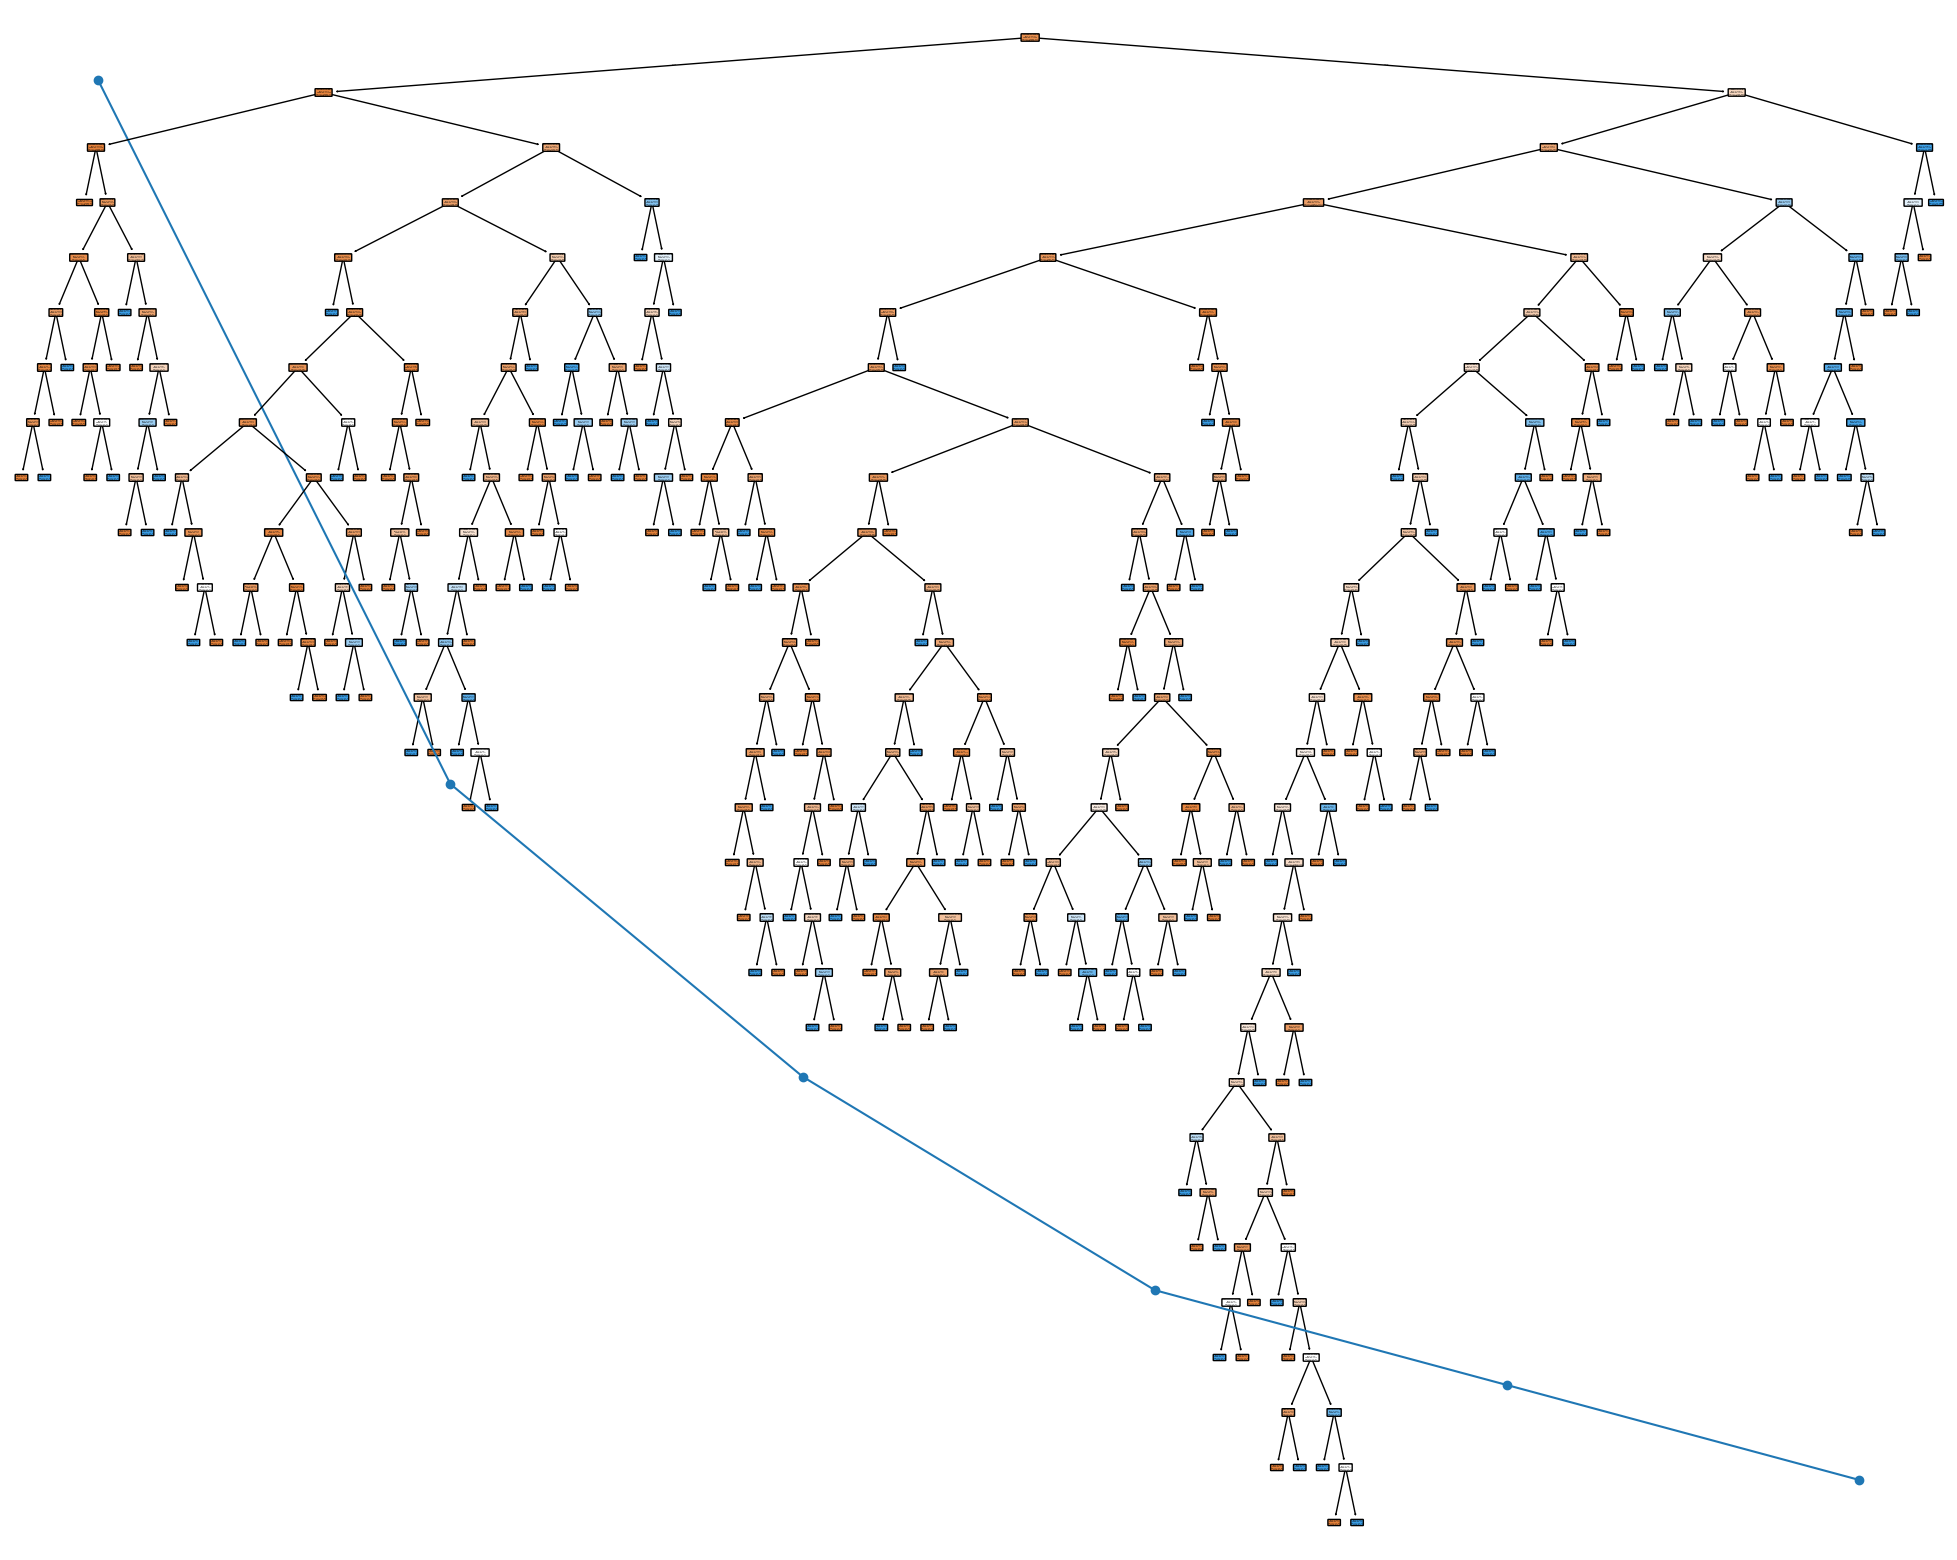

In [125]:
plt.plot(ks,inertia,'-o')
plt.xlabel('number of cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [126]:
# tradeoff between number of clusters k and inertia...thus, find 'elbow point' and choose k based on judgement

In [127]:
df = px.data.iris()

In [128]:
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species',
                size='petal_length', hover_data=['petal_width'])
fig.show()

In [129]:
fig = px.scatter_3d(df, x='sepal_width', y='sepal_length', z='petal_width', color='species')
fig.show()

In [130]:
# these graphs show the 'truth' - actual labels 

In [131]:
# KMeans clustering of the data...
scikit-learn.org/1.5/auto_examples/cluster/plot_cluster_iris.html

NameError: name 'scikit' is not defined

Inertia: 32.86731883116883
Inertia: 78.8556658259773
Inertia: 142.7540625


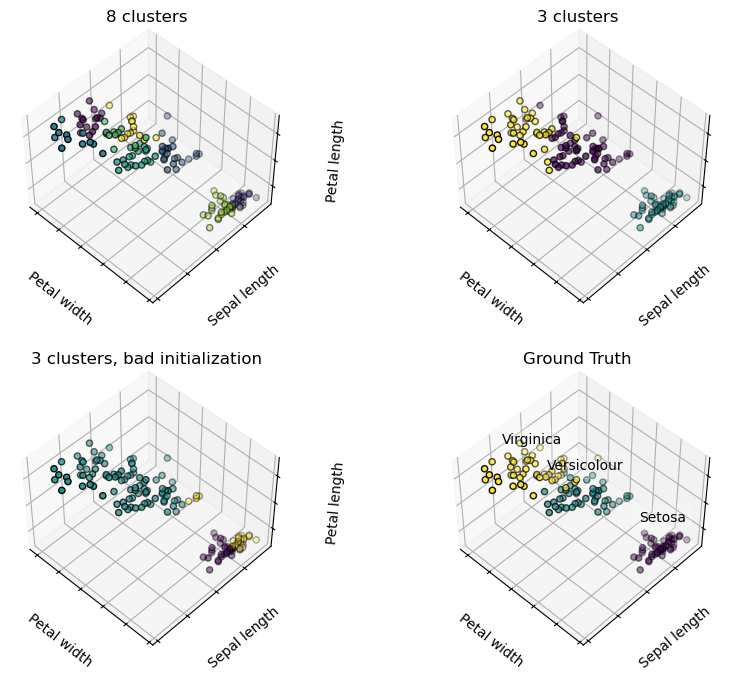

In [132]:
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(10)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    print('Inertia:', est.inertia_)

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


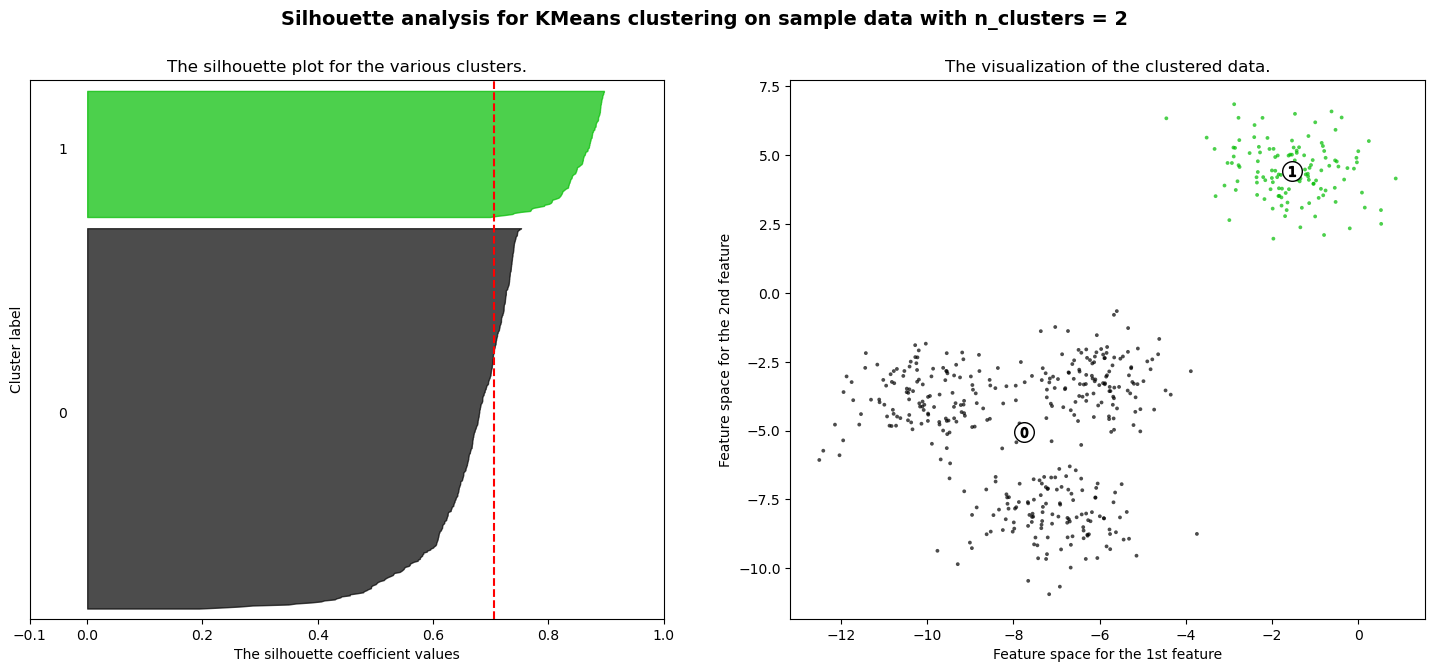

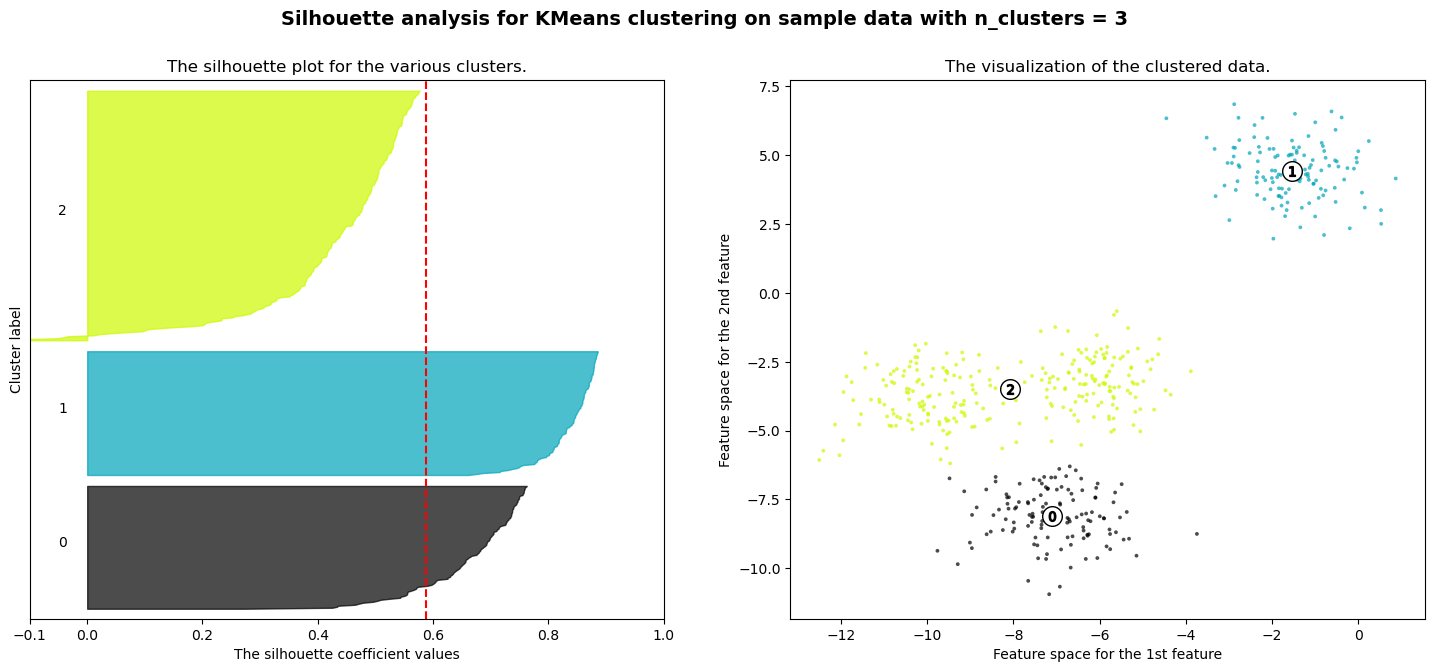

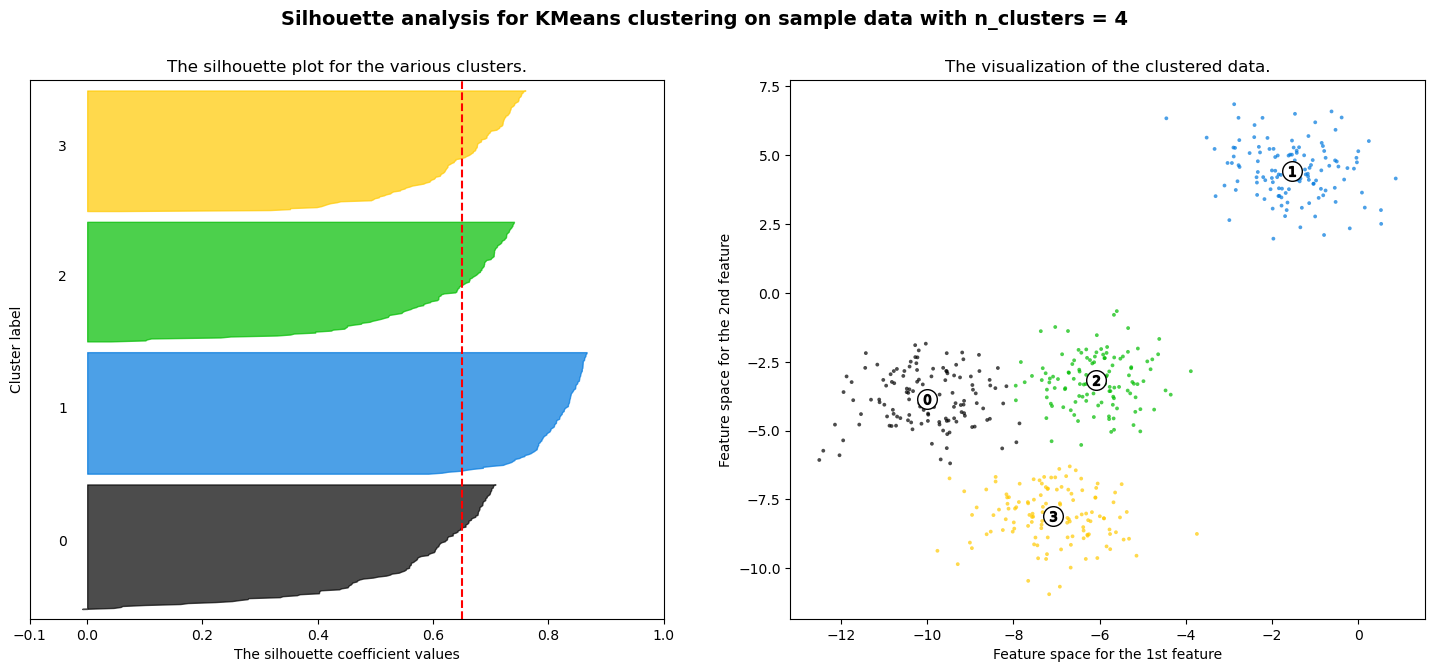

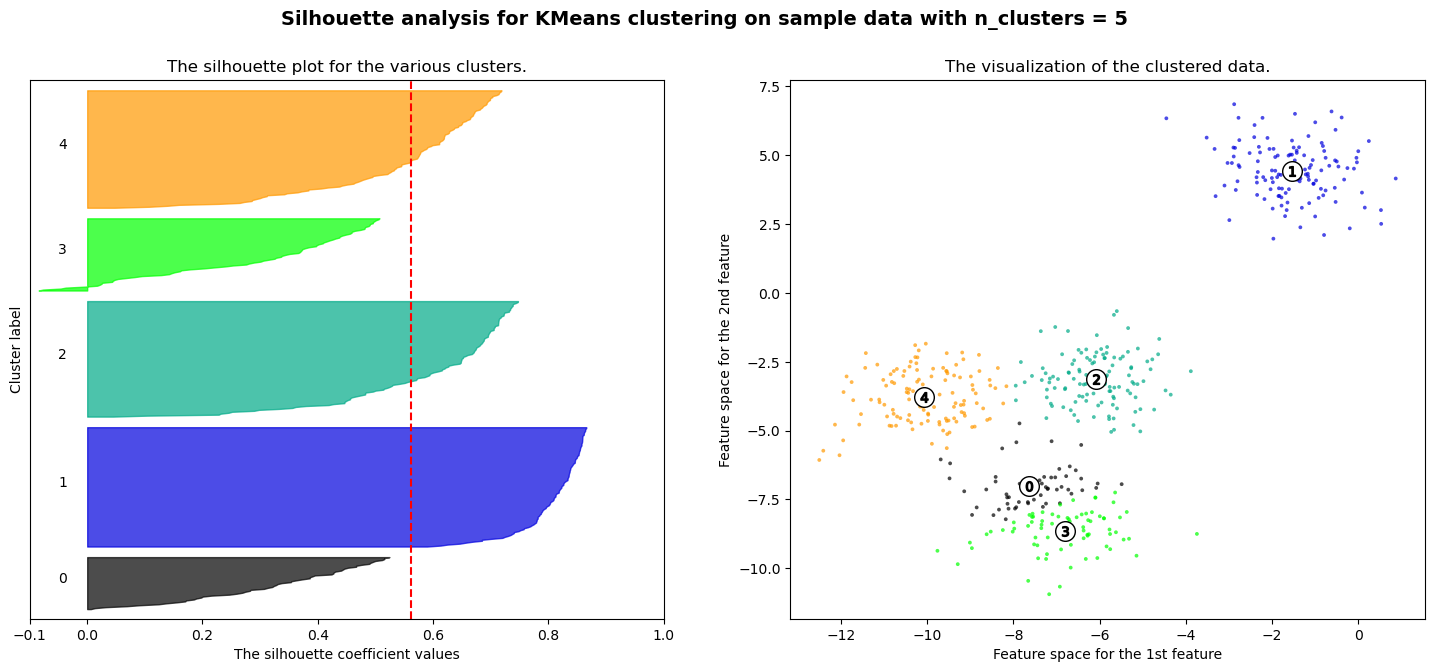

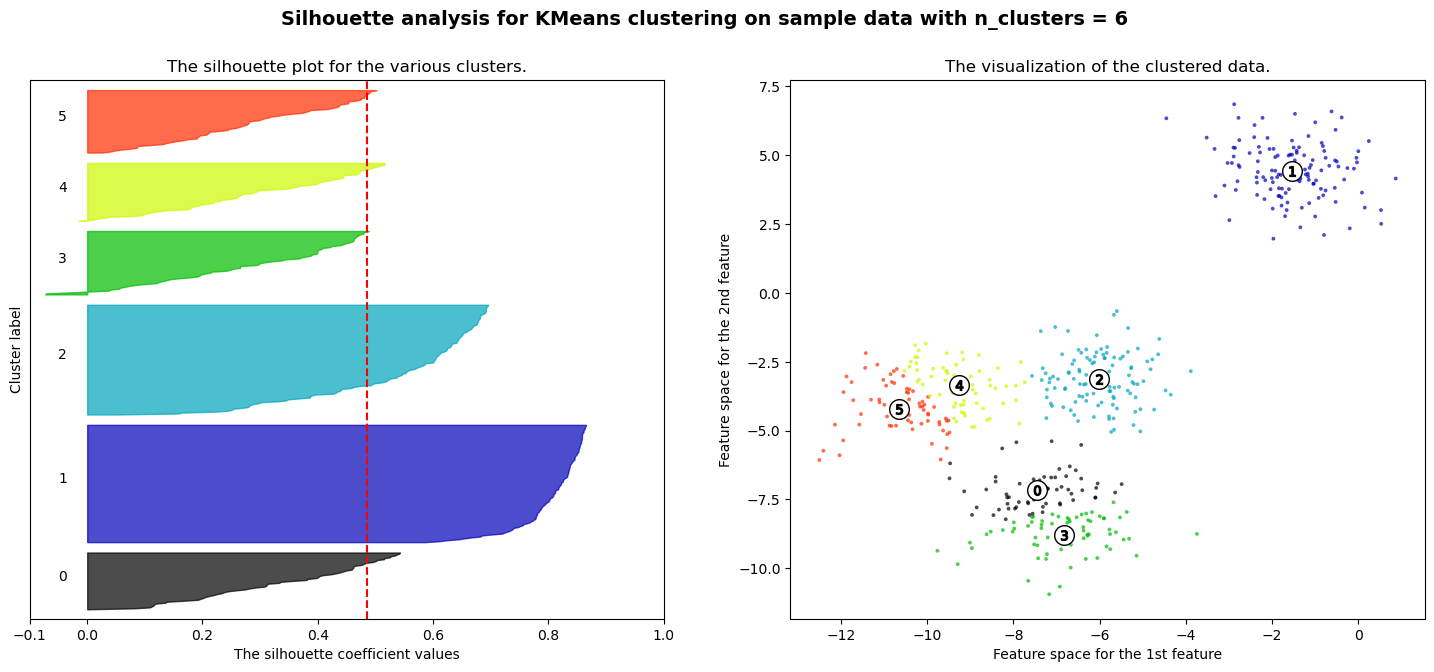

In [133]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()